<a href="https://colab.research.google.com/github/na-learning/ML-Logistic-Regression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

1. Load the breast cancer data into a Pandas dataframe and create variables for the features and target.
2. Do a little exploratory data analysis to help familiarize yourself with the data. Look at the first few rows of data, for example. Generate some summary statistics for each feature. Look at the distribution of the target variable. Maybe create a pair-plot for some of the variables. Create a heatmap of correlation between features. Is the multicollinearity assumption broken? Also, generate some boxplots to see how feature distributions change for each target. This part is a bit open-ended. Be creative!

In [153]:
# Load data and split into feature and target variables

data = load_breast_cancer()

feature_names = data.feature_names
target_names = data.target_names

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df = df.dropna(how="any")

# View first 5 rows of the data
df.head(5)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [154]:
# Generate summary statistics for the data
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


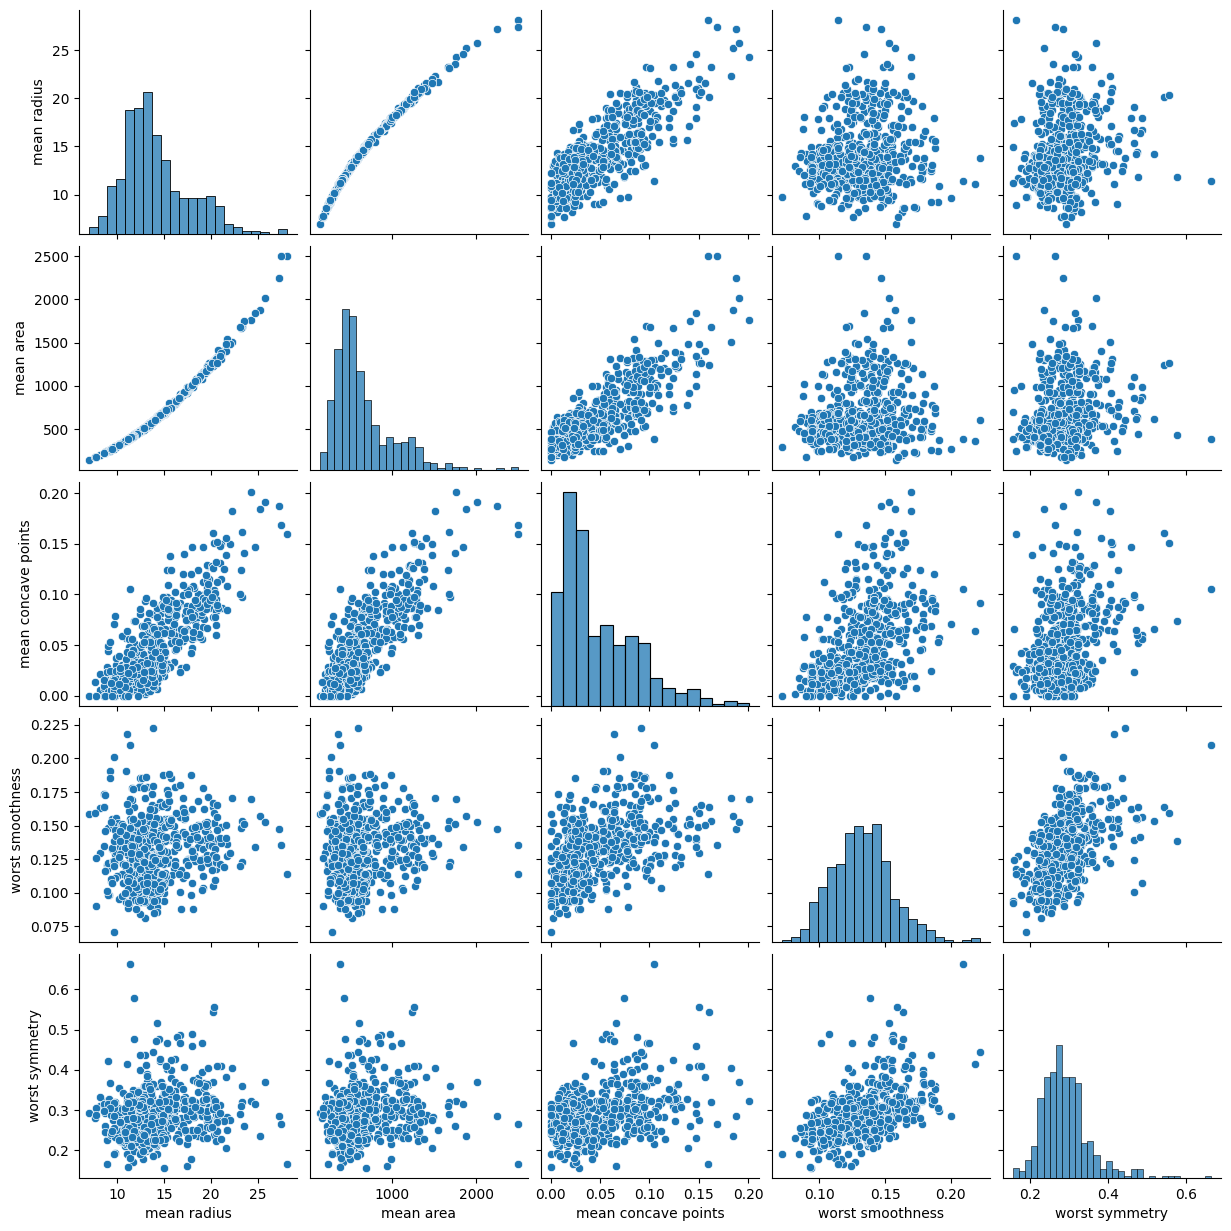

In [155]:
# pair-plot for some of the variables
sns.pairplot(df[['mean radius', 'mean area', 'mean concave points', 'worst smoothness', 'worst symmetry']])

In [156]:
# heatmap of correlation between features

corr = df[['mean radius', 'mean area', 'mean concave points', 'worst smoothness', 'worst symmetry']].corr()
corr

,mean radius,mean area,mean concave points,worst smoothness,worst symmetry
mean radius,1.000000,0.987357,0.822529,0.119616,0.163953
mean area,0.987357,1.000000,0.823269,0.123523,0.143570
mean concave points,0.822529,0.823269,1.000000,0.452753,0.375744
worst smoothness,0.119616,0.123523,0.452753,1.000000,0.493838
worst symmetry,0.163953,0.143570,0.375744,0.493838,1.000000


<Axes: >

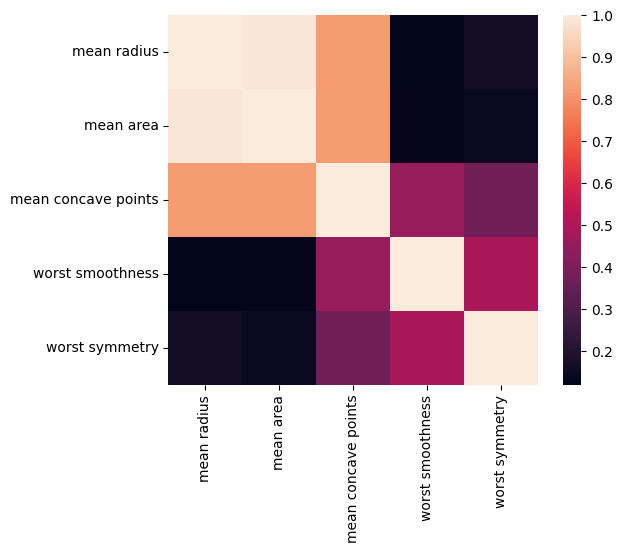

In [157]:
sns.heatmap(corr, square=True)

# Is the multicollinearity assumption broken?
# Severe Multicollinearity seems to exist. For example between mean radius and mean area.

<Axes: xlabel='target', ylabel='mean radius'>

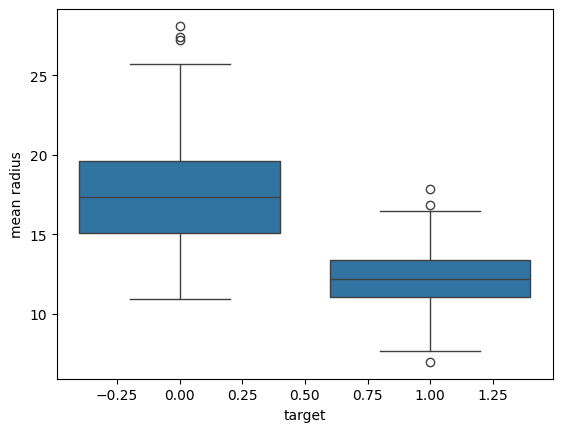

In [168]:
# generate some boxplots to see how feature distributions change for each target

sns.boxplot(x = 'target', y = 'mean radius', data = df, native_scale=True)


<Axes: xlabel='target', ylabel='fractal dimension error'>

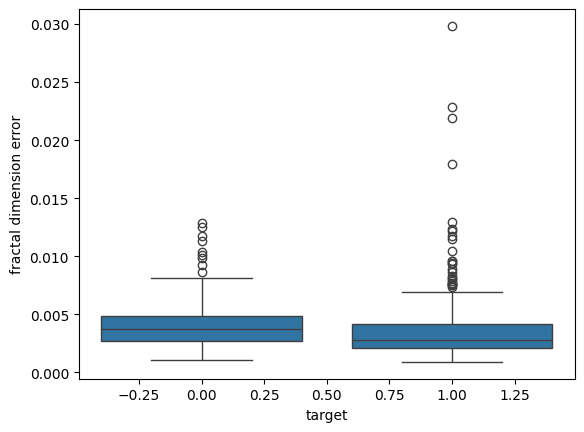

In [169]:
sns.boxplot(x = 'target', y = 'fractal dimension error', data = df, native_scale=True)

1. Use train_test_split to create a training and test sets for the data.
2. Use LogisticRegression to train a model on the training data. Make sure you understand the inputs to the model. Try using the "liblinear" solver here.

In [159]:
# Split data into training and test sets

X = df.iloc[:, :-1].values

y = df.loc[:, 'target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)


In [160]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Scaled model yielding better score

In [161]:
# Build and train logistic regression model
clf = LogisticRegression(random_state=1)

clf.fit(X_train, y_train)

LogisticRegression(random_state=1)

1. Use your model to make predictions on the test data.
2. Generate a confusion matrix with the test results. How many false positives and false negatives did the model predict?
3. Use classification_report to generate further analysis of your model's predictions. Make sure you understand everything in the report and are able to explain what all the metrics mean.

In [162]:
# Evaluate the model
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Training accuracy: 0.9882629107981221
Test accuracy: 0.972027972027972


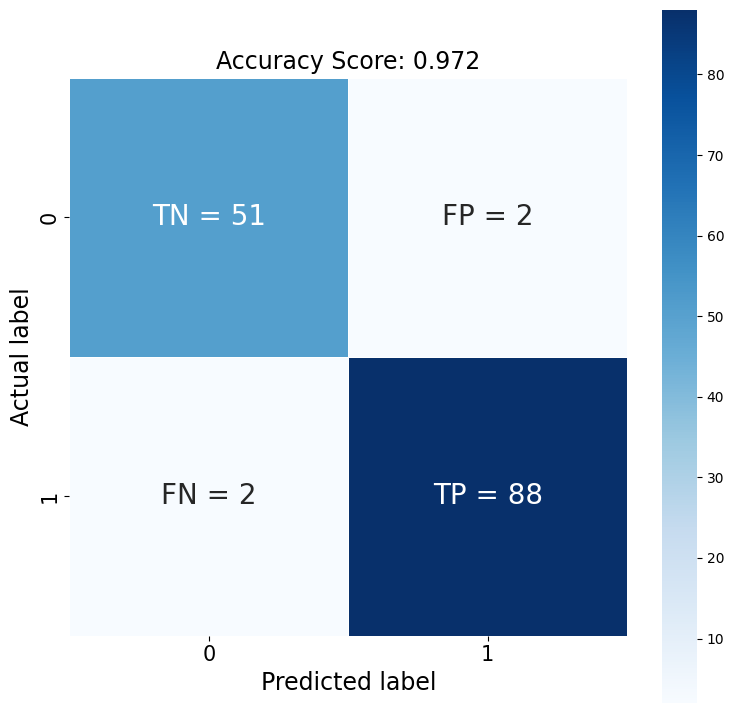

In [163]:
# Generate a confusion matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

modified_cm = []
for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap = 'Blues'
            );

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {:.3f}'.format(clf.score(X_test, y_test)), size = 17);
plt.tick_params(labelsize= 15)

# False Positives = 2, False Negatives = 2

In [164]:
# Generate a classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.98      0.98      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



1. Extract the model coefficients from your trained model.
2. Normalize the coefficients by the standard deviation of each feature in the training data.
3. Sort feature names and coefficients by absolute value of coefficients.
4. Visualize the feature importances by creating a horizontal bar chart using e.g. barh. Based on magnitude, what appears to be the most important predictor of cancer in this dataset?

In [165]:
# Extract coefficients

# divide your coefficient array element wise by the scaler.scale_ array

coefficients = np.true_divide(clf.coef_,  scaler.scale_)

print(coefficients[0])

# subtract from your intercept the inner product of the resulting coefficients (the division result) array with the scaler.mean_ array
intercept = clf.intercept_ - np.dot(coefficients, scaler.mean_)

print(intercept)


[-1.52852626e-01 -6.86117575e-02 -2.07996352e-02 -1.73240650e-03
 -4.94687630e+00  1.09877645e+01 -9.27320867e+00 -1.81773328e+01
  1.03581122e+00  5.43569147e+01 -4.40706633e+00 -3.27047421e-01
 -3.59860418e-01 -1.81370210e-02 -6.35536319e+01  3.69024941e+01
  5.94202200e+00 -5.09670109e+01  4.21863800e+01  1.55405059e+02
 -1.97801084e-01 -1.88269387e-01 -2.30927281e-02 -1.60533738e-03
 -3.89687804e+01  4.51359201e-02 -5.11414714e+00 -9.27620069e+00
 -1.63553877e+01 -1.70862099e+01]
[32.38137256]


In [166]:
# Normalize the coefficients by the standard deviation
mean = df.iloc[:, :-1].mean().to_numpy()
std = df.iloc[:, :-1].std().to_numpy()

normalized_coefficients = []

for index, value in np.ndenumerate(coefficients[0]):
  normalized_coefficients.append((value - mean[index])/std[index])

normalized_coefficients = np.array(normalized_coefficients)
print(normalized_coefficients)

[-4.05219822e+00 -4.50083685e+00 -3.78574858e+00 -1.86093931e+00
 -3.58588640e+02  2.06075652e+02 -1.17436408e+02 -4.69714322e+02
  3.11753331e+01  7.68998969e+03 -1.73531101e+01 -2.79870452e+00
 -1.59552508e+00 -8.87103190e-01 -2.11691234e+04  2.05922754e+03
  1.95789984e+02 -8.26198557e+03  5.10088829e+03  5.87290612e+04
 -3.40702831e+00 -4.20833199e+00 -3.19274371e+00 -1.54663022e+00
 -1.71252687e+03 -1.32918387e+00 -2.58183544e+01 -1.42864330e+02
 -2.69050342e+02 -9.50661734e+02]


<Axes: ylabel='Feature'>

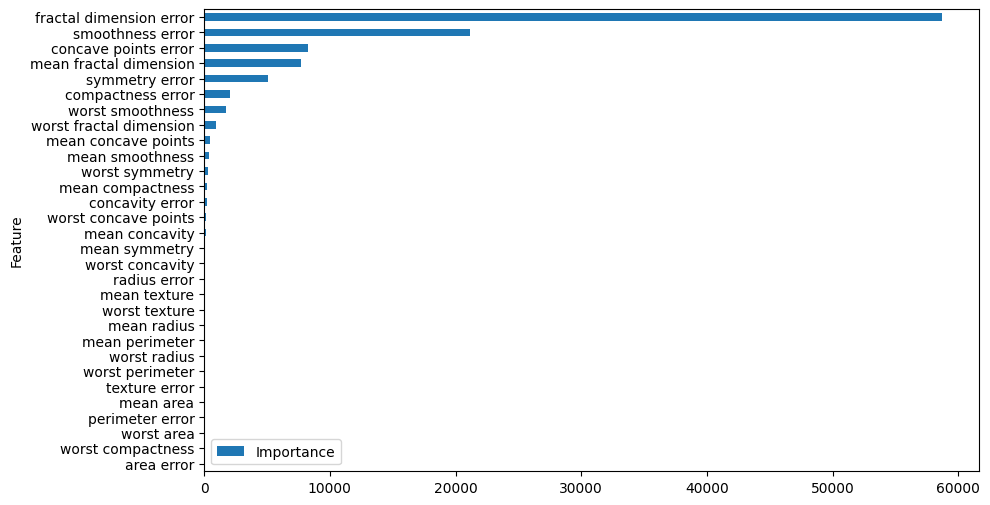

In [167]:
# Visualize feature importances
feature_importance = pd.DataFrame({'Feature': df.iloc[:, :-1].columns, 'Importance': np.abs(normalized_coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

# 'fractal dimension error' seems to be the most important predictor